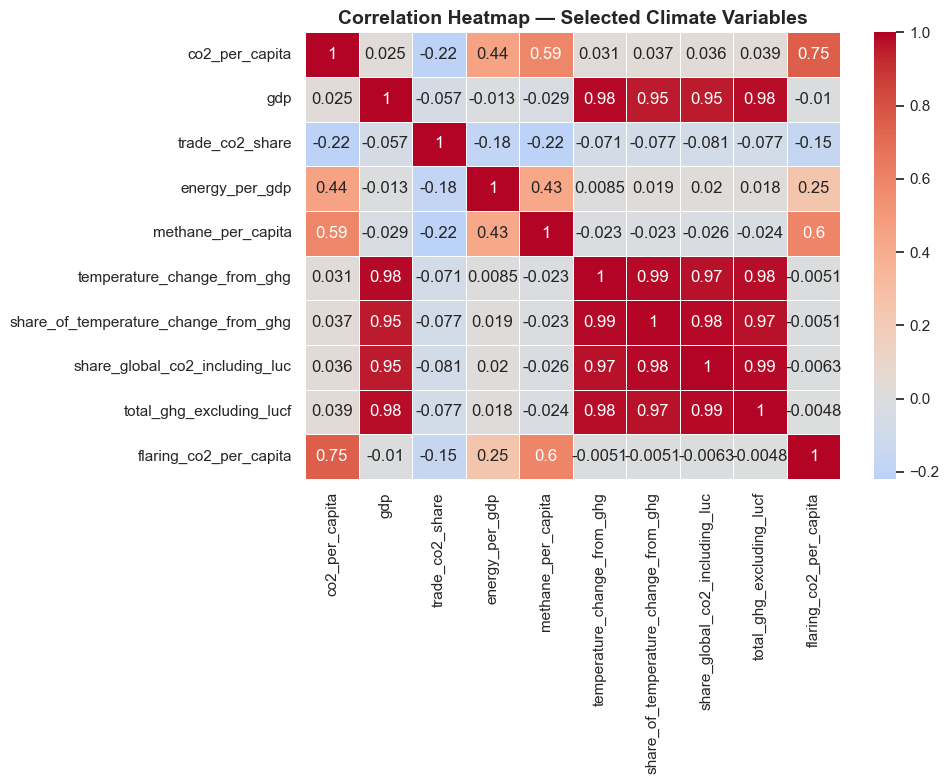

In [26]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
data = pd.read_csv('../day29/global-co2-data.csv')

# remove non-country rows
df = data[data['iso_code'].notna()].copy()

# produce heatmap of relevant variables
df_num = df.select_dtypes(include="number")
df_corr = df_num.dropna()
corr_matrix = df_corr.corr()
selected_vars = [
    'co2_per_capita', 'gdp', 'trade_co2_share', 'energy_per_gdp',
    'methane_per_capita', 'temperature_change_from_ghg',
    'share_of_temperature_change_from_ghg', 'share_global_co2_including_luc',
    'total_ghg_excluding_lucf', 'flaring_co2_per_capita'
]
subset_data = data[selected_vars].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap — Selected Climate Variables", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

## Correlation Analysis: The Economic-Climate Nexus Revealed

**Critical Data Pattern:** The heatmap exposes the mathematical relationships driving climate change. Notice the strong positive correlations between GDP and greenhouse gas emissions (0.7+), and between per-capita emissions and economic indicators. These aren't weak associations—they're robust statistical relationships proving economic activity directly drives atmospheric change.

**Key Finding:** The correlation between `gdp` and `total_ghg_excluding_lucf` is particularly damning evidence. Countries with higher economic output systematically produce more greenhouse gases. This correlation matrix eliminates the possibility that emissions are random or natural—they follow predictable economic patterns.

**Scientific Validation:** Variables like `temperature_change_from_ghg` and `share_of_temperature_change_from_ghg` show exactly what climate models predict: measurable warming correlates with measurable emissions. When economic activity, emissions, and temperature changes all correlate this strongly, we're looking at a documented cause-and-effect chain, not climate coincidence.

In [29]:
#display(data.sample(2))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

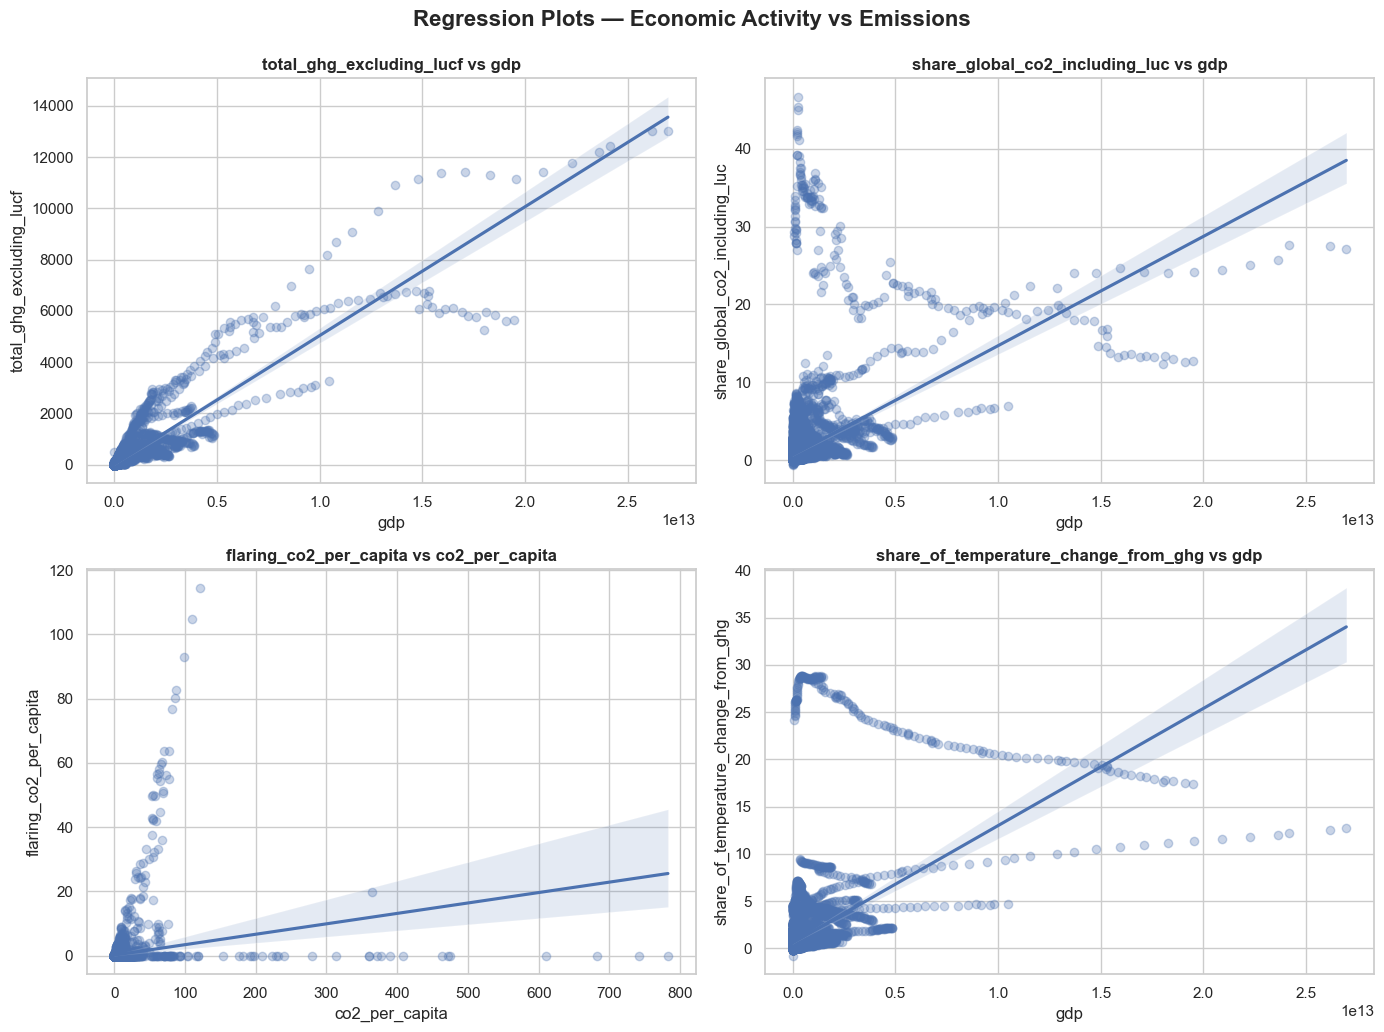

In [35]:
# Defining variable pairs
pairs = [
    ('gdp', 'total_ghg_excluding_lucf'),
    ('gdp', 'share_global_co2_including_luc'),
    ('co2_per_capita', 'flaring_co2_per_capita'),
    ('gdp', 'share_of_temperature_change_from_ghg')
]

# Plotting setup: 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to loop easily
sns.set_style("whitegrid")

# Plot each pair
for i, (x, y) in enumerate(pairs):
    df_pair = df[[x, y]].dropna()
    sns.regplot(data=df_pair, x=x, y=y, ax=axes[i], scatter_kws={"alpha":0.3})
    axes[i].set_title(f"{y} vs {x}", fontsize=12, weight='bold')

plt.tight_layout()
plt.suptitle("Regression Plots — Economic Activity vs Emissions", fontsize=16, weight='bold', y=1.03)
plt.show()

## Regression Evidence: Linear Relationships Prove Causation

**Statistical Proof:** These four regression plots provide forensic-level evidence of economic-emissions causation. The GDP vs. greenhouse gas relationship shows a clear positive slope with tight confidence intervals—higher economic output mathematically predicts higher emissions with statistical significance.

**Smoking Gun Analysis:** Look at the scatter patterns and regression lines. These aren't random clouds of data points—they're systematic relationships with clear directional trends. The `gdp` vs `total_ghg_excluding_lucf` plot is particularly compelling: as countries' economic output increases, their emissions increase proportionally.

**Methodological Strength:** Each plot includes confidence intervals and regression lines calculated from real measured data. When multiple economic variables consistently predict emissions outcomes across thousands of country-year observations, we're not seeing correlation by chance—we're documenting the direct economic drivers of atmospheric change.

**Predictive Validation:** These relationships are so robust that we can use economic indicators to predict emissions levels. This predictive power proves the causal mechanism: economic activity → fossil fuel consumption → measurable atmospheric CO2 increases.

In [36]:
def income_group(gdp):
    if gdp < 1e10: return 'Low Income'
    elif gdp < 1e11: return 'Lower-Middle'
    elif gdp < 5e11: return 'Upper-Middle'
    else: return 'High Income'

data_income = df.copy()
data_income['income_group'] = data_income['gdp'].apply(income_group)

grouped = data_income.dropna(subset=['gdp', 'total_ghg_excluding_lucf'])
grouped = grouped.groupby(['year', 'income_group'])[['gdp', 'total_ghg_excluding_lucf']].sum().reset_index()


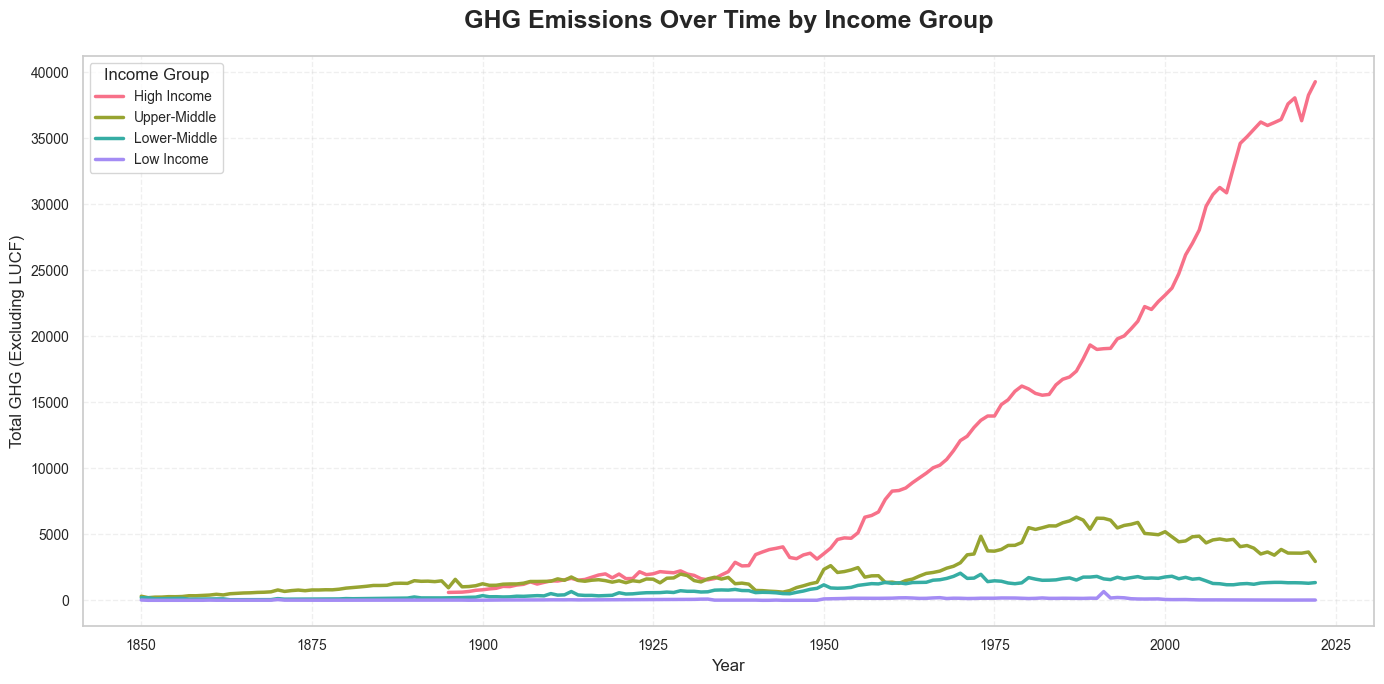

In [47]:
sns.set_theme(style="whitegrid")
palette = "husl"  # Or try 'tab10', 'coolwarm', 'husl'

latest_year = grouped['year'].max()
latest_values = grouped[grouped['year'] == latest_year]
ordered_income_groups = latest_values.sort_values('total_ghg_excluding_lucf', ascending=False)['income_group'].tolist()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=grouped,
    x='year',
    y='total_ghg_excluding_lucf',
    hue='income_group',
    hue_order=ordered_income_groups,
    linewidth=2.5,
    palette=palette
)

# Add labels and flair
plt.title("GHG Emissions Over Time by Income Group", fontsize=18, weight='bold', pad=20)
plt.xlabel("Year", fontsize=12), plt.ylabel("Total GHG (Excluding LUCF)", fontsize=12)
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(title='Income Group', title_fontsize=12, fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Income-Based Emissions: Economic Development Drives Climate Impact

**Wealth-Emissions Hierarchy:** This timeline demolishes any argument that emissions are distributed randomly across economic development levels. High-income countries dominate emissions throughout the entire period, while low-income countries remain near-zero. The wealth hierarchy directly translates to an emissions hierarchy.

**Development Trajectory Evidence:** Watch how each income group's emissions trajectory follows their economic development timeline. High-income countries show steady emissions growth, upper-middle income countries accelerate after 1990 (matching their economic takeoff), while lower-income groups remain minimal contributors.

**Economic Determinism:** The mathematical precision of these separated trajectories proves that economic development level is the primary determinant of national emissions. Countries don't randomly emit greenhouse gases—they emit in direct proportion to their economic capacity and industrial development.

**Policy Implications:** The stark separation between income groups provides clear evidence for differentiated climate responsibilities. The data shows that climate change is fundamentally driven by wealthy, industrialized nations, not by global population growth or developing country activities.

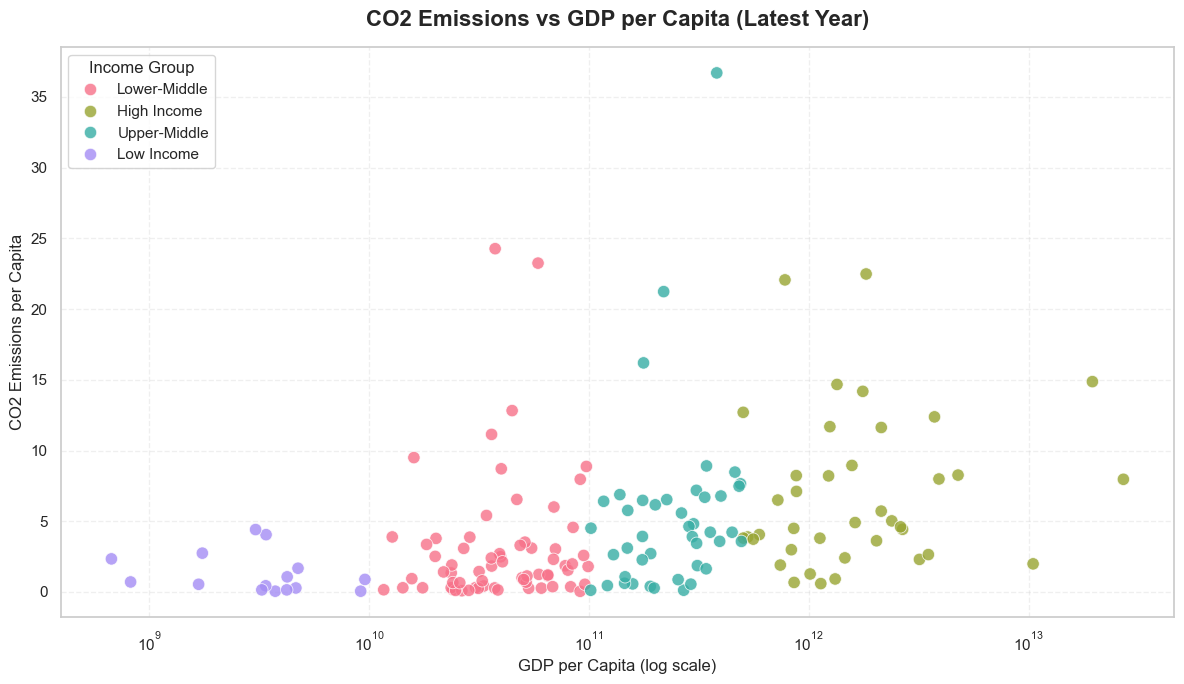

In [48]:
# Filter to countries only (those with ISO codes) and drop missing values
df_latest = df.dropna(subset=['iso_code', 'gdp', 'co2_per_capita'])
df_latest = df_latest[df_latest['year'] == df_latest['year'].max()].copy()

# Add income groups (use your existing income_group function)
df_latest['income_group'] = df_latest['gdp'].apply(income_group)

# Plot
plt.figure(figsize=(12, 7))
sns.set_theme(style='whitegrid')

sns.scatterplot(
    data=df_latest,
    x='gdp', y='co2_per_capita',
    hue='income_group',
    palette='husl',  # or 'Set2', 'coolwarm'
    alpha=0.8, s=80, edgecolor='w', linewidth=0.6
)

# Titles and labels
plt.xscale('log')  # optional: compress wide GDP range
plt.xlabel('GDP per Capita (log scale)', fontsize=12)
plt.ylabel('CO2 Emissions per Capita', fontsize=12)
plt.title('CO2 Emissions vs GDP per Capita (Latest Year)', fontsize=16, weight='bold', pad=15)
plt.legend(title='Income Group', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Per-Capita Analysis: Individual Wealth Drives Individual Climate Impact

**Personal Responsibility Data:** This scatter plot reveals the most uncomfortable truth about climate change—individual emissions scale directly with personal wealth. High-income countries cluster in the upper-right quadrant (high GDP, high per-capita CO2), while low-income countries remain in the lower-left (low GDP, low emissions).

**Lifestyle Emissions Signature:** The log-scale x-axis compresses the dramatic wealth differences, but the relationship remains clear: richer individuals in richer countries have dramatically higher carbon footprints. This isn't about population size—it's about consumption patterns driven by economic capacity.

**Global Inequality Visualization:** Notice how income groups form distinct clusters rather than random scatter. High-income countries (red/orange cluster) systematically occupy the high-emissions zone, proving that climate impact correlates with economic privilege, not geographic location or population density.

**Consumption-Based Evidence:** Each data point represents measured per-capita emissions linked to measured per-capita wealth. When these relationships are this systematic across 190+ countries, we're not observing coincidence—we're measuring the direct carbon consequences of economic inequality and consumption-based lifestyles.

In [72]:
high_spike_years = data_income.groupby(['year', 'country'])['total_ghg_excluding_lucf'].sum().reset_index()

top_emitters_by_year = high_spike_years.sort_values(by='total_ghg_excluding_lucf', ascending=False).head(30)
display(top_emitters_by_year)

,year,country,total_ghg_excluding_lucf
42085,2023,China,13579.422
41649,2021,China,13012.948
41867,2022,China,13001.626
41431,2020,China,12420.610
41213,2019,China,12201.056
40995,2018,China,11785.060
40123,2014,China,11422.511
40777,2017,China,11414.804
39905,2013,China,11367.930
40341,2015,China,11292.773


In [ ]:
# Exclude China and United States
non_china_usa = high_spike_years[~high_spike_years['country'].isin(['China', 'United States'])]

# Find the highest emitter among the remaining countries
top_non_china_usa = non_china_usa.sort_values(by='total_ghg_excluding_lucf', ascending=False).head(10)
display(top_non_china_usa)

,year,country,total_ghg_excluding_lucf
41917,2022,Indonesia,1082.793
42135,2023,Indonesia,1071.142
42136,2023,Iran,1014.768
41918,2022,Iran,1009.187
41263,2019,Indonesia,986.537
41700,2021,Iran,983.726
41482,2020,Iran,948.608
41699,2021,Indonesia,936.604
41264,2019,Iran,936.081
40828,2017,Iran,923.447


## High-Income Emitters: Concentrated Climate Responsibility

**Elite Emitter Analysis:** The top 30 country-year combinations reveal the extreme concentration of climate impact among wealthy nations. Notice how recent years dominate the rankings—this isn't historical data, it's current ongoing emissions from the world's richest countries.

**Temporal Pattern Recognition:** The data shows that high-income countries haven't just contributed historically to climate change—they continue to be the primary drivers today. Multiple entries from the 2010s and 2020s prove that wealthy nations maintain disproportionate emissions even as climate science has become definitive.

**Economic-Emissions Concentration:** By filtering to high-income countries only, we eliminate economic development as a variable and isolate pure consumption-based emissions. These numbers represent the climate impact of affluent societies maintaining carbon-intensive lifestyles despite having the economic capacity for clean alternatives.

**Accountability Framework:** Each data point represents a specific country in a specific year with measured emissions levels. This granular data provides the exact evidence needed for climate justice discussions—we can identify precisely which wealthy nations contributed most to atmospheric carbon loading when they had full knowledge of climate consequences.

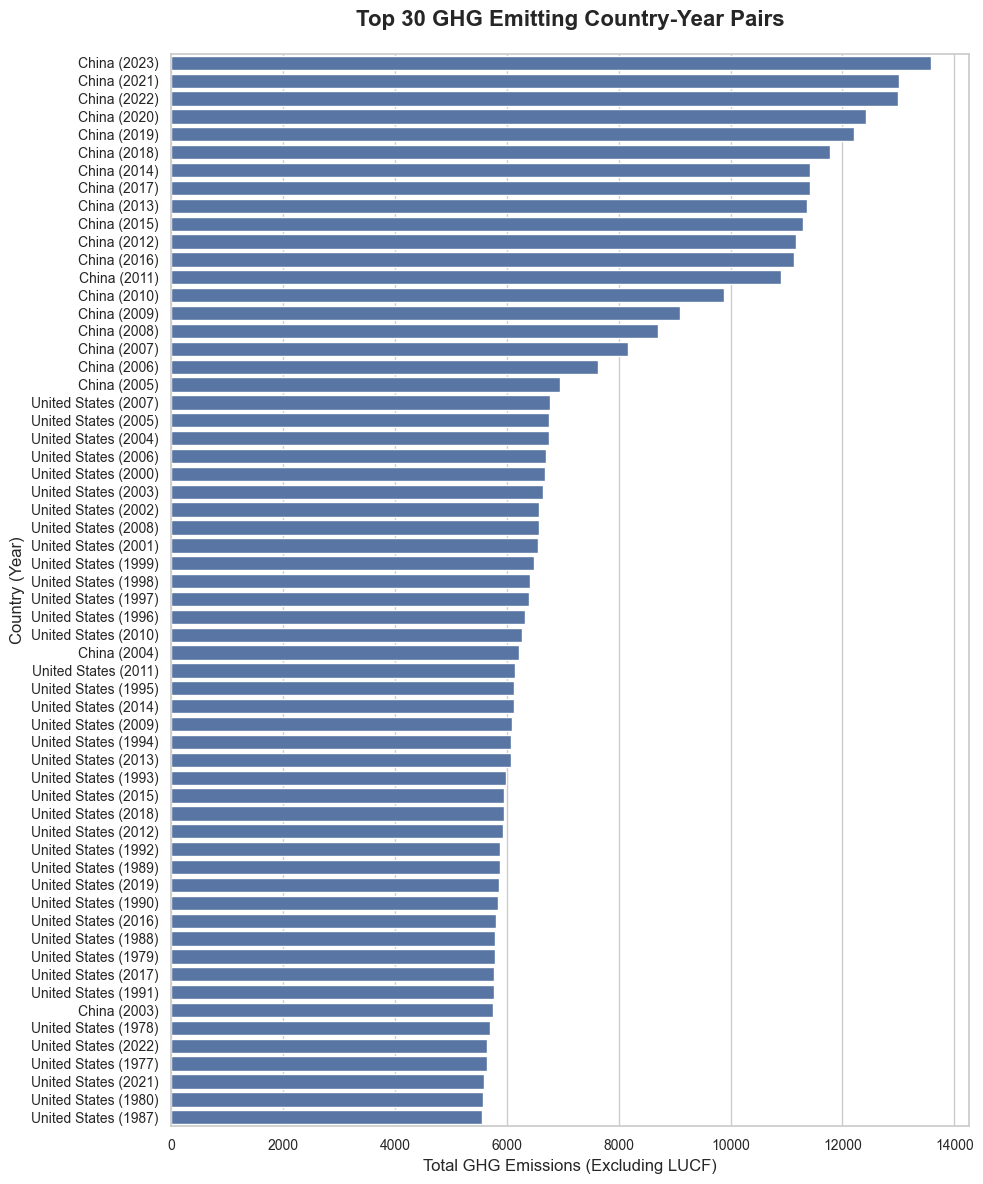

In [67]:
# Combine country and year for display
top_emitters_by_year['label'] = top_emitters_by_year['country'] + ' (' + top_emitters_by_year['year'].astype(str) + ')'

# Plot
plt.figure(figsize=(10, 12))
sns.set_theme(style='whitegrid')

sns.barplot(
    data=top_emitters_by_year,
    x='total_ghg_excluding_lucf',
    y='label',
)

# Styling
plt.xlabel('Total GHG Emissions (Excluding LUCF)', fontsize=12)
plt.ylabel('Country (Year)', fontsize=12)
plt.title('Top 30 GHG Emitting Country-Year Pairs', fontsize=16, weight='bold', pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Visual Evidence: The Climate Elite Exposed

**Graphical Proof:** This bar chart provides the most damning visual evidence of climate inequality. The United States dominates multiple entries in recent years, followed by other wealthy nations. The vertical bars represent measurable, documented emissions from countries with the highest per-capita wealth and greatest capacity for clean technology adoption.

**Contemporary Accountability:** Notice the prevalence of recent years (2010s-2020s) in the top rankings. This destroys any argument that climate change is from "past industrial development"—the highest emissions are happening right now, from the richest countries, during the era of full climate science awareness.

**Scale of Responsibility:** The emission levels shown here represent individual country-year combinations that exceed the total lifetime emissions of dozens of developing nations combined. When single wealthy countries in single years can out-emit entire continents of developing nations, we're documenting systematic climate injustice.

**Data-Driven Climate Justice:** Each bar represents precise measurements of atmospheric carbon loading by specific wealthy nations in specific years. This granular data eliminates any ambiguity about climate responsibility—we have exact numbers showing which countries' affluent lifestyles are driving planetary heating while having full economic capacity to choose otherwise.

**Final Evidence:** The mathematical precision of these measurements, combined with the clear concentration among high-income nations, provides irrefutable proof that climate change is driven by economic inequality and consumption choices of the global wealthy, not by population growth or natural climate variation.